In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from os.path import join
from matplotlib.colors import ListedColormap
from sklearn import neighbors , datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression

# 1. 데이터 보기

In [75]:
datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

#txt파일 읽기
columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')
    
# cloumns = attribute    
abalone = pd.read_csv(datapath, names = columns)

abalone_M = abalone.loc[abalone['Sex'] == 'M']
abalone_F = abalone.loc[abalone['Sex'] == 'F']
abalone_I = abalone.loc[abalone['Sex'] == 'I']
Y = abalone['Sex']
X = abalone
del X['Sex']

# 1.1 각 데이터에 대해 종류별로 Boxplot

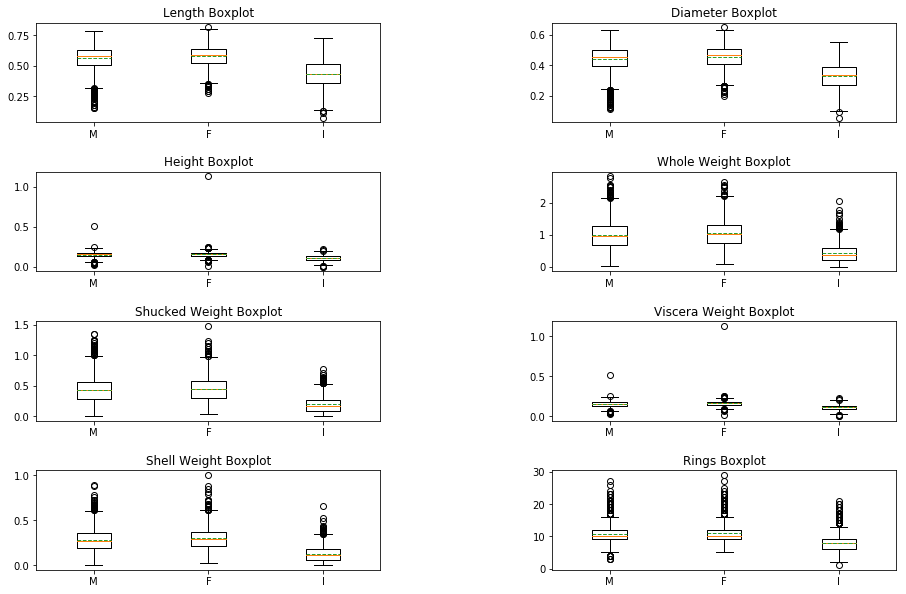

In [76]:
fig, axs = plt.subplots(4,2)

#Length
axs[0, 0].boxplot([abalone_M['Length'], abalone_F['Length'], abalone_I['Length']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[0, 0].set_title('Length Boxplot')

#Diameter
axs[0, 1].boxplot([abalone_M['Diameter'], abalone_F['Diameter'], abalone_I['Diameter']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[0, 1].set_title('Diameter Boxplot')

#Height
axs[1, 0].boxplot([abalone_M['Height'], abalone_F['Height'], abalone_I['Height']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[1, 0].set_title('Height Boxplot')

#Whole Weight
axs[1, 1].boxplot([abalone_M['Whole weight'], abalone_F['Whole weight'], abalone_I['Whole weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[1, 1].set_title('Whole Weight Boxplot')

#Shucked Weight
axs[2, 0].boxplot([abalone_M['Shucked weight'], abalone_F['Shucked weight'], abalone_I['Shucked weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[2, 0].set_title('Shucked Weight Boxplot')

#Viscera Weight
axs[2, 1].boxplot([abalone_M['Height'], abalone_F['Height'], abalone_I['Height']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[2, 1].set_title('Viscera Weight Boxplot')

#Shell Weight
axs[3, 0].boxplot([abalone_M['Shell weight'], abalone_F['Shell weight'], abalone_I['Shell weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[3, 0].set_title('Shell Weight Boxplot')

#Rings
axs[3, 1].boxplot([abalone_M['Rings'], abalone_F['Rings'], abalone_I['Rings']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[3, 1].set_title('Rings Boxplot')

fig.subplots_adjust(left = 0.01, right = 2, bottom = 0.1, top = 2, hspace = 0.5, wspace = 0.5)

plt.show()

# 2. Train, Testset 분류

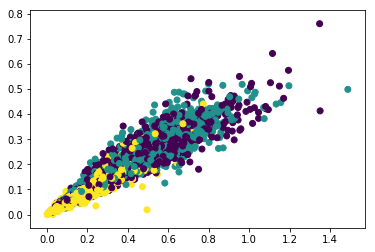

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
c = []
for i in Y_train : 
    if i =='M' :
        c.append(0)
    elif i == 'F' :
        c.append(1)  
    else : 
        c.append(2)
        
plt.scatter(X_train.iloc[:,4] , X_train.iloc[:,5] , marker='o', c= c , )
plt.show()

## 정규화 

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #변수들의 척도(Scale)가 서로 다를 경우에 상호 비교를 위해서 표준화하는 방법
scaler.fit(X_train)
trnx_scale = scaler.transform(X_train)
tstx_scale = scaler.transform(X_test)

c:\users\s\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 3. 모델에 적용

## 3.1 KNN

In [79]:
# k 값을 의미하는 변수
n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(trnx_scale, Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(clf.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf.score(tstx_scale, Y_test) * 100))


uniform  학습 세트 정확도  : 61.854%
uniform  테스트 세트 정확도: 55.183%


In [80]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf2.fit(trnx_scale, Y_train)


print("uniform  학습 세트 정확도  : {:.3f}%".format(clf2.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf2.score(tstx_scale, Y_test) * 100))

uniform  학습 세트 정확도  : 100.000%
uniform  테스트 세트 정확도: 54.705%


## 3.1.1 Weighted vote

In [81]:
clf3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf3.fit(trnx_scale, Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(clf3.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf3.score(tstx_scale, Y_test) * 100))

uniform  학습 세트 정확도  : 100.000%
uniform  테스트 세트 정확도: 54.705%


## 3.2 Decision Tree

In [82]:
estimator = DecisionTreeClassifier()
estimator.fit(trnx_scale, Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(estimator.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(estimator.score(tstx_scale, Y_test) * 100))
print("특성 중요도:\n{}".format(estimator.feature_importances_))

uniform  학습 세트 정확도  : 100.000%
uniform  테스트 세트 정확도: 48.963%
특성 중요도:
[0.09092752 0.0899453  0.07343727 0.12067852 0.12959285 0.2871836
 0.10999669 0.09823825]


### 3.2.1 가지치기

In [83]:
estimator2 = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = None,
                                   max_leaf_nodes = None,
                                  )
estimator2.fit(trnx_scale, Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(estimator2.score(trnx_scale, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(estimator2.score(tstx_scale, Y_test) * 100))

uniform  학습 세트 정확도  : 100.000%
uniform  테스트 세트 정확도: 48.884%


## 3.3 Logistic Regreesion

In [84]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', max_iter = 1000)

logreg.fit(trnx_scale, Y_train)
print("학습 세트 정확도: {:.3f}%".format(logreg.score(trnx_scale, Y_train) * 100))
print("테스트 세트 정확도: {:.3f}%".format(logreg.score(tstx_scale, Y_test) * 100))

학습 세트 정확도: 56.380%
테스트 세트 정확도: 57.097%


## 3.4 MLPClassifier 

In [88]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
nn_model.fit(X=trnx_scale, y=Y_train)
print("학습 세트 정확도: {:.3f}%".format(nn_model.score(trnx_scale, Y_train) * 100))
print("테스트 세트 정확도: {:.3f}%".format(nn_model.score(tstx_scale, Y_test) * 100))

nn_pred = nn_model.predict(X=tstx_scale)
print('--------------nn_pred---------------')
print(nn_pred)
print('--------------------------------')
print()

print('-------------real y------------')
print(Y_test)
print('-----------------------------')

학습 세트 정확도: 54.191%
테스트 세트 정확도: 55.742%
--------------nn_pred---------------
['I' 'M' 'I' ... 'I' 'M' 'I']
--------------------------------

-------------real y------------
17      F
1131    M
299     M
1338    M
2383    F
2039    I
3127    F
791     F
3599    M
1566    I
3281    M
3009    I
1004    F
4053    F
1070    I
1167    M
3167    M
2618    F
2966    M
2939    F
610     F
1708    M
913     I
280     F
3450    F
2698    F
2088    F
3312    F
1962    F
880     M
       ..
10      F
3455    M
3018    I
3626    M
4130    M
3074    M
958     I
1513    M
2256    M
248     I
3817    M
623     F
1828    I
2872    I
569     F
2543    F
1734    M
3007    M
1373    M
3084    I
3261    F
1165    F
228     F
2570    I
448     M
802     M
3016    I
2886    M
2580    M
2814    I
Name: Sex, Length: 1254, dtype: object
